### Import required libraries

In [1]:
import pandas                   as      pd
import numpy                    as      np
import matplotlib.pyplot        as      plt
import seaborn                  as      sns
import sys, os

from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.tree             import _tree

from   sklearn                  import  metrics 
from   sklearn.metrics          import  classification_report
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  roc_curve, auc

from   sklearn.model_selection  import  KFold,  train_test_split

from   sklearn.cross_validation import  cross_val_score, KFold

import pydotplus

%matplotlib inline

D:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print("\nCurrent working directory %s" %os.getcwd())

column_names    = ['preg', 'plas', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age', 'label']
df              = pd.read_csv('D:/RRD/data/pima-indians-diabetes.data.CSV',\
                              header= None, names = column_names)

print(df.columns)
print(df.shape)


Current working directory D:\RRD\Courseware\ipynb files
Index(['preg', 'plas', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age',
       'label'],
      dtype='object')
(768, 9)


In [3]:
n    =  df.shape[0]
df.isnull().any()

preg       False
plas       False
pres       False
skin       False
insulin    False
mass       False
pedi       False
age        False
label      False
dtype: bool

In [4]:
df.astype(bool).sum(axis=0)

preg       657
plas       763
pres       733
skin       541
insulin    394
mass       757
pedi       768
age        768
label      268
dtype: int64

In [5]:
df['plas'].replace(0, np.nan, inplace=True)
df['pres'].replace(0, np.nan, inplace=True)
df['skin'].replace(0, np.nan, inplace=True)
df['mass'].replace(0, np.nan, inplace=True)

In [6]:
df.isnull().any()

preg       False
plas        True
pres        True
skin        True
insulin    False
mass        True
pedi       False
age        False
label      False
dtype: bool

In [7]:
df.dropna(axis = 0, inplace = True)
df.isnull().any()

preg       False
plas       False
pres       False
skin       False
insulin    False
mass       False
pedi       False
age        False
label      False
dtype: bool

In [8]:
### --------------------
### get the shape
### --------------------
print('\nGet the shape')
print(df.shape)
### --------------------
### Get the data structure
### --------------------
print('\nGet the data structure')
print(df.info())
### -----------------------
### Get the first five rows
### -----------------------
print('\nPrint first five rows')
print(df.head())


Get the shape
(532, 9)

Get the data structure
<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
preg       532 non-null int64
plas       532 non-null float64
pres       532 non-null float64
skin       532 non-null float64
insulin    532 non-null int64
mass       532 non-null float64
pedi       532 non-null float64
age        532 non-null int64
label      532 non-null int64
dtypes: float64(5), int64(4)
memory usage: 41.6 KB
None

Print first five rows
   preg   plas  pres  skin  insulin  mass   pedi  age  label
0     6  148.0  72.0  35.0        0  33.6  0.627   50      1
1     1   85.0  66.0  29.0        0  26.6  0.351   31      0
3     1   89.0  66.0  23.0       94  28.1  0.167   21      0
4     0  137.0  40.0  35.0      168  43.1  2.288   33      1
6     3   78.0  50.0  32.0       88  31.0  0.248   26      1


In [9]:
categorical_var =  ['preg','insulin','label']

for i in range(len(categorical_var)):
    df[categorical_var[i]] = df[categorical_var[i]].astype('category') 

print(df['label'].dtype)

category


In [10]:
print(df['label'].value_counts())

0    355
1    177
Name: label, dtype: int64


In [11]:
df.describe()

,plas,pres,skin,mass,pedi,age
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,121.030075,71.505639,29.182331,32.890226,0.502966,31.614662
std,30.999226,12.310253,10.523878,6.881109,0.344546,10.761584
min,56.000000,24.000000,7.000000,18.200000,0.085000,21.000000
25%,98.750000,64.000000,22.000000,27.875000,0.258750,23.000000
50%,115.000000,72.000000,29.000000,32.800000,0.416000,28.000000
75%,141.250000,80.000000,36.000000,36.900000,0.658500,38.000000
max,199.000000,110.000000,99.000000,67.100000,2.420000,81.000000


In [12]:
df.describe(include = ['category'])

,preg,insulin,label
count,532,532,532
unique,17,185,2
top,1,0,0
freq,116,140,355


In [13]:
feature_names   = df.columns
feature_names  =  feature_names.drop('label')
X              =  df.loc[:,feature_names] 
y              =  df.loc[:,'label']
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(532, 8)
(532,)


Check if the y (dataset) is balanced or not

In [14]:
y.value_counts().apply(lambda x: [x, ( x * 100) / df.shape[0]])

0    [355, 66.72932330827068]
1    [177, 33.27067669172932]
Name: label, dtype: object

In [15]:
seed      = 1
test_size = 0.30
X_train, X_test, y_train, y_test = \
       train_test_split(X, y, test_size = test_size, random_state = seed, stratify = y) 

In [16]:
y_train.value_counts().apply(lambda x: [x, ( x * 100) / y_train.shape[0]])

0     [248, 66.66666666666667]
1    [124, 33.333333333333336]
Name: label, dtype: object

In [17]:
y_test.value_counts().apply(lambda x: [x, ( x * 100) / y_test.shape[0]])

0    [107, 66.875]
1     [53, 33.125]
Name: label, dtype: object

In [18]:
clf    = DecisionTreeClassifier()
clf    = clf.fit(X_train,y_train)

In [19]:
#Predict the response for train dataset
predicted_train = clf.predict(X_train)

In [20]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)


Training Data
[[248   0]
 [  0 124]]


In [21]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

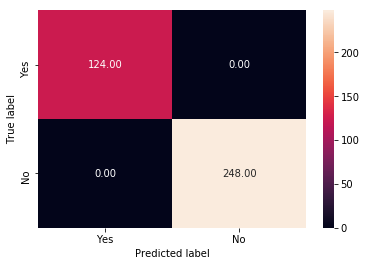

In [22]:
draw_cm(y_train, predicted_train )

In [23]:
accuracy_train = clf.score(X_train, y_train) 
measures_train     = classification_report(y_train, predicted_train) 

print("\nTraining data\n")
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))
print(measures_train) 


Training data

Training Accuracy: 100.000%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       248
          1       1.00      1.00      1.00       124

avg / total       1.00      1.00      1.00       372



In [24]:
'''
This function draws a ROC curve and shows the AUROC
'''
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

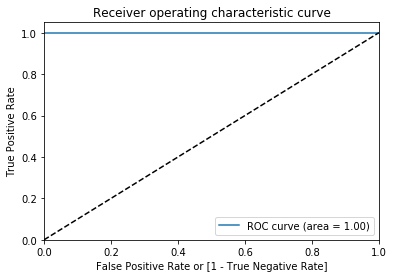

(array([0., 1.]), array([1., 1.]), array([1, 0], dtype=int64))

In [25]:
n_splits           =  10
random_state       =  1234
scoring            = 'roc_auc'
kfold              =  KFold(n= X_train.shape[0],n_folds = n_splits, random_state = random_state)
auc_train          = cross_val_score(clf, X_train, y_train,  scoring = scoring) 
draw_roc( y_train, predicted_train)    

In [26]:
#Predict the response for test dataset
predicted_testing = clf.predict(X_test)

In [27]:
matrix             = confusion_matrix(y_test, predicted_testing)
accuracy_train     = clf.score(X_test, y_test) 
measures_test      = classification_report(y_test, predicted_testing) 

print("\nTesting Data")
print(matrix)
print("Testing Accuracy: %.3f%%" % (accuracy_train * 100.0))
print(measures_test) 


Testing Data
[[83 24]
 [29 24]]
Testing Accuracy: 66.875%
             precision    recall  f1-score   support

          0       0.74      0.78      0.76       107
          1       0.50      0.45      0.48        53

avg / total       0.66      0.67      0.66       160



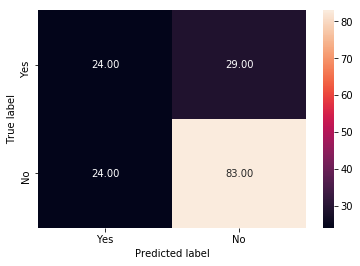

In [28]:
draw_cm(y_test, predicted_testing )

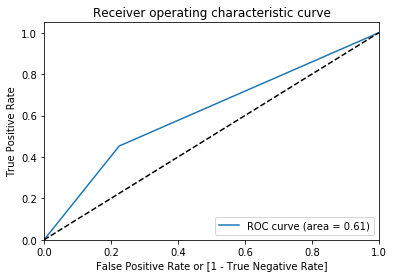

(array([0.        , 0.22429907, 1.        ]),
 array([0.        , 0.45283019, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [29]:
draw_roc( y_test, predicted_testing)  

In [30]:
def draw_decision_tree(clf, X, y, flist, file_name):
    from sklearn.tree            import export_graphviz
    from sklearn.externals.six   import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(12.5, 6)
    import pydot
    #dot_data = StringIO()  
    file_name_dot = file_name + '.dot'
    file_name_png = file_name + '.png'
    
    export_graphviz(clf, out_file = file_name_dot, feature_names = flist,
                    class_names = ['No Diabetes' , 'Diabetes'],
                    filled = True, rounded = True)
    (graph,) = pydot.graph_from_dot_file(file_name_dot)
    graph.write_png(file_name_png)
    return Image(file_name_png)

### This tree is unpruned

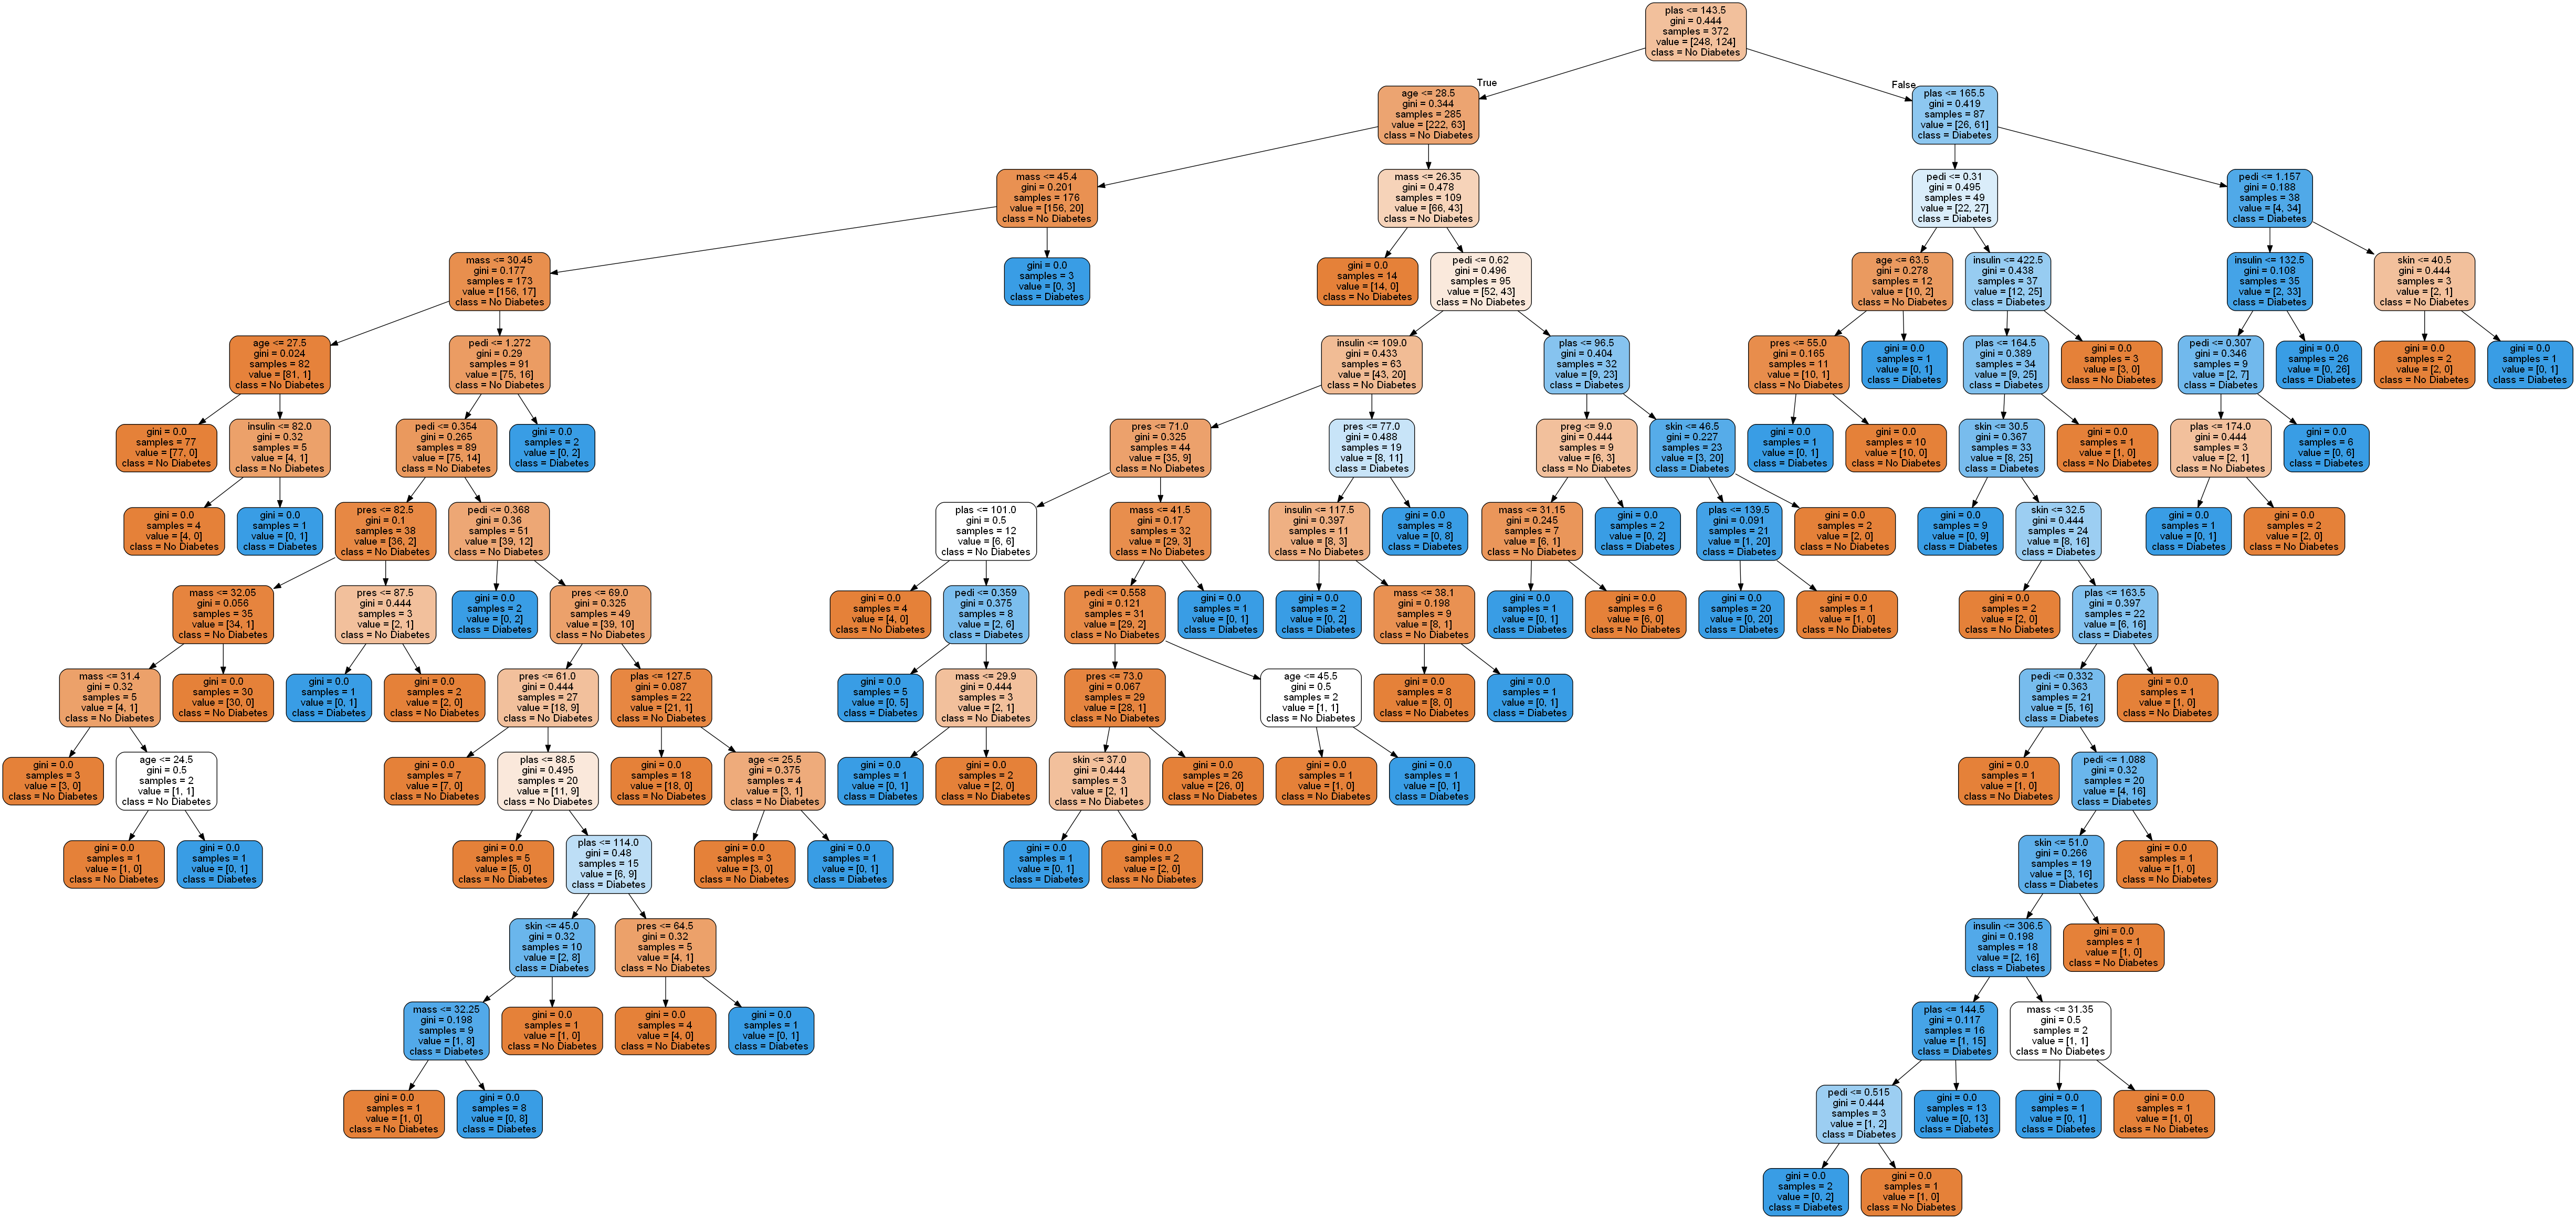

In [31]:
draw_decision_tree(clf, X_train, y_train, feature_names, 'diabetes')

In [32]:
clf1    =   DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_impurity_decrease = 0)

In [33]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
#Predict the response for train dataset
predicted_train = clf1.predict(X_train)

In [35]:
print("\nTraining data")
matrix             = confusion_matrix(y_train, predicted_train)
print(matrix)
measures_train     = classification_report(y_train, predicted_train) 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, predicted_train))
print(measures_train) 


Training data
[[204  44]
 [ 25  99]]
Accuracy: 0.8145161290322581
             precision    recall  f1-score   support

          0       0.89      0.82      0.86       248
          1       0.69      0.80      0.74       124

avg / total       0.82      0.81      0.82       372



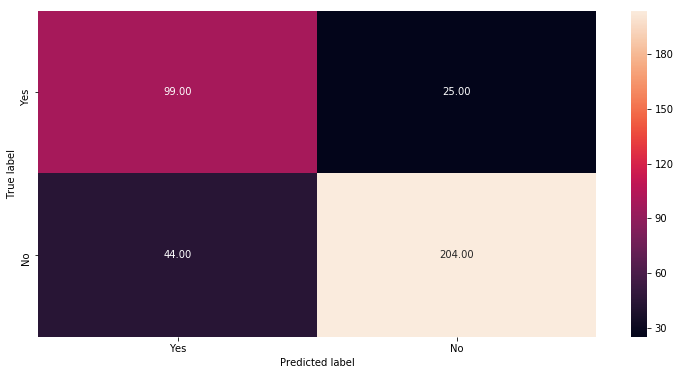

In [36]:
draw_cm(y_train, predicted_train )

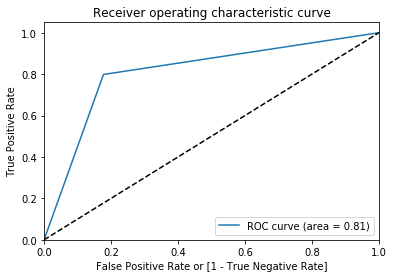

(array([0.        , 0.17741935, 1.        ]),
 array([0.       , 0.7983871, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [37]:
n_splits           =  10
random_state       =  1234
scoring            = 'roc_auc'
kfold              =  KFold(n= X_train.shape[0],n_folds = n_splits, random_state = random_state)
auc_train          = cross_val_score(clf, X_train, y_train,  scoring = scoring) 
draw_roc( y_train, predicted_train)  

In [38]:
#Predict the response for test dataset
predicted_test = clf1.predict(X_test)

In [39]:
print("\nTesting data")
matrix             = confusion_matrix(y_test, predicted_test)
print(matrix)
measures_test      = classification_report(y_test, predicted_test) 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted_test))
print(measures_test) 


Testing data
[[90 17]
 [13 40]]
Accuracy: 0.8125
             precision    recall  f1-score   support

          0       0.87      0.84      0.86       107
          1       0.70      0.75      0.73        53

avg / total       0.82      0.81      0.81       160



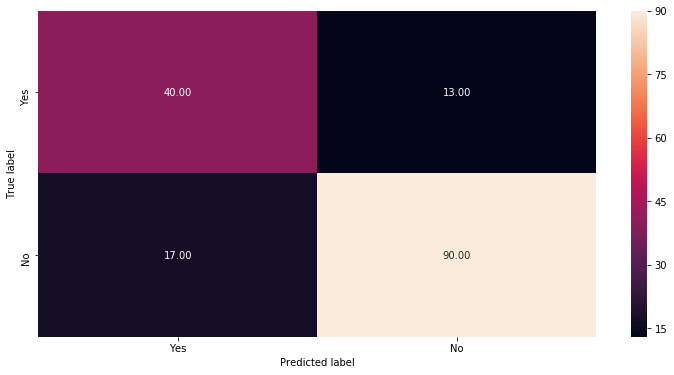

In [40]:
draw_cm(y_test, predicted_test)

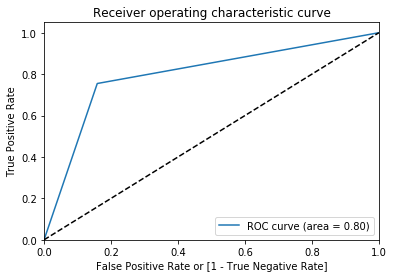

(array([0.       , 0.1588785, 1.       ]),
 array([0.        , 0.75471698, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [41]:
n_splits           =  10
random_state       =  1234
scoring            = 'roc_auc'
kfold              =  KFold(n= X_test.shape[0],n_folds = n_splits, random_state = random_state)
auc_test           =  cross_val_score(clf1, X_test, y_test,  scoring = scoring) 
draw_roc( y_test, predicted_test)  

### Find the optimum cutoff

We know the data set is not balanced and hence the standard cut-off of 50% for creating the confusion matrix will not hold good. We need to find the optimum cut-off to divide the data set into two classes.

In [42]:
"""
  This function calculates the Youdens J score which gives the optimum cut-off point 
  given the fpr, tpr and thresholds
"""
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = np.abs(tpr - fpr)
    j_ordered = sorted(zip(j_scores,thresholds, fpr, tpr))
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    res = {'fpr': j_ordered[-1][2], 'tpr': j_ordered[-1][3], 'threshold' : j_ordered[-1][1]}
    return res

In [43]:
predicted_proba_tr = clf1.predict_proba(X_train)[:,1]

{'fpr': 0.1774193548387097,
 'threshold': 0.5352112676056338,
 'tpr': 0.7983870967741935}

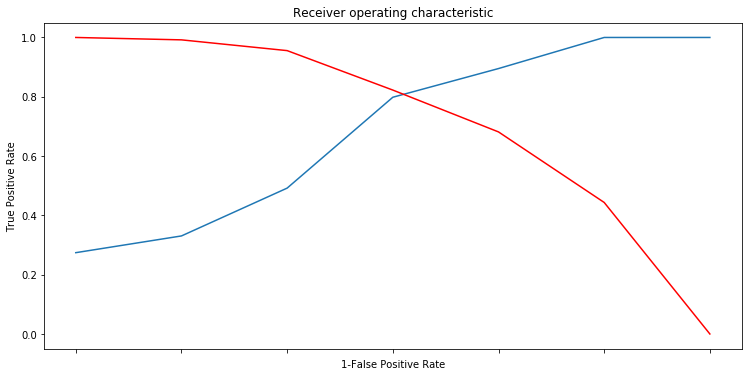

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predicted_proba_tr, \
                                         drop_intermediate = True )
get_youdens_j_cutoff(fpr, tpr, thresholds)  

## Rework on the training data with new cutoff 0.54

In [45]:
threshold__train_df                =  pd.DataFrame()  
threshold__train_df['Actual']      =  y_train
threshold                          =  0.5352
cutoff_df                          =  pd.DataFrame()
print("\nThreshold is %0.3f" %threshold,"\n")


Threshold is 0.535 



[[ 99  25]
 [ 44 204]]


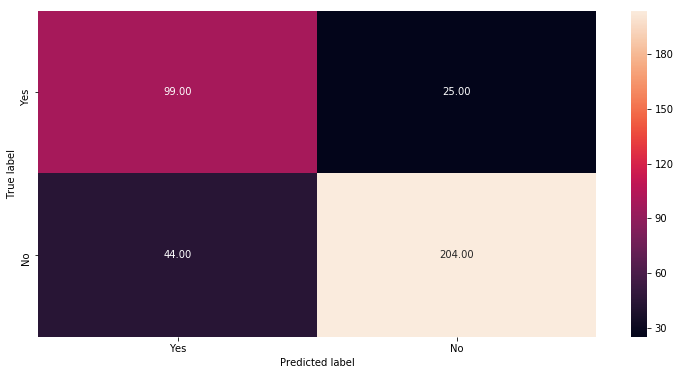

In [46]:
threshold__train_df['Probability'] = predicted_proba_tr
threshold__train_df['pred']        =  threshold__train_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
cm                                = confusion_matrix(threshold__train_df['Actual'].astype('int'),\
                                                   threshold__train_df['pred'],[1,0])
print(cm)
draw_cm(threshold__train_df['Actual'].astype('int'),\
                                                   threshold__train_df['pred'])

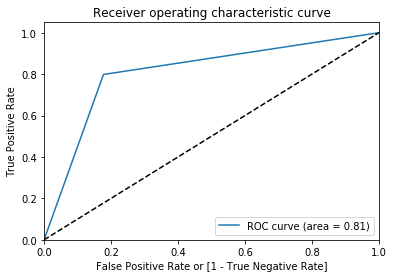

   Threshold    Recall  Precision  Accuracy Ratio
0     0.5352  0.822581    0.89083       81.451613


In [47]:
draw_roc(threshold__train_df['Actual'].astype('int'),\
                                                   threshold__train_df['pred']) 
precision                         = np.diag(cm) / np.sum(cm, axis = 0)
recall                            = np.diag(cm) / np.sum(cm, axis = 1) 
accuracy_ratio                    = ((cm[0,0] + cm[1,1]) * 100) / \
                                     (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
recall_positive                   = recall[1]
precision_positive                = precision[1]
cutoff_df_ind                     = pd.DataFrame({'Threshold': threshold, \
                                                  'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
print(cutoff_df_ind)

### Rework on the testing data with new cutoff 0.54

In [48]:
threshold__test_df                =  pd.DataFrame()  
threshold__test_df['Actual']      =  y_test
threshold                          =  0.5352
cutoff_df                          =  pd.DataFrame()
print("\nThreshold is %0.3f" %threshold,"\n")


Threshold is 0.535 



In [49]:
predicted_proba_test = clf1.predict_proba(X_test)[:,1]

[[40 13]
 [17 90]]


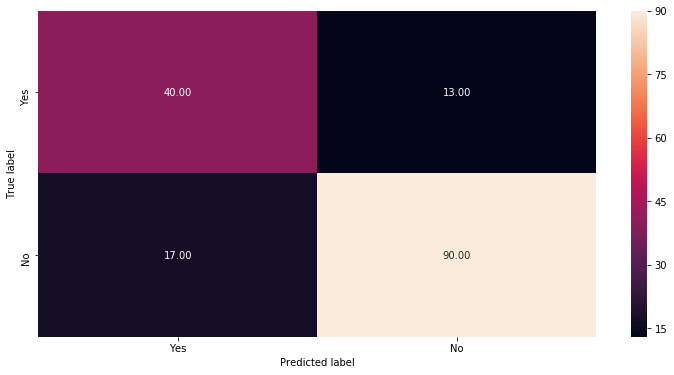

In [50]:
threshold__test_df['Probability'] =  predicted_proba_test
threshold__test_df['pred']        =  threshold__test_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
cm                                = confusion_matrix(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'],[1,0])
print(cm)
draw_cm(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'])

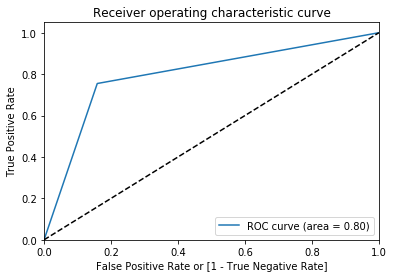

   Threshold    Recall  Precision  Accuracy Ratio
0     0.5352  0.841121   0.873786           81.25


In [51]:
draw_roc(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred']) 
precision                         = np.diag(cm) / np.sum(cm, axis = 0)
recall                            = np.diag(cm) / np.sum(cm, axis = 1) 
accuracy_ratio                    = ((cm[0,0] + cm[1,1]) * 100) / \
                                     (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
recall_positive                   = recall[1]
precision_positive                = precision[1]
cutoff_df_ind                     = pd.DataFrame({'Threshold': threshold, \
                                                  'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
print(cutoff_df_ind)

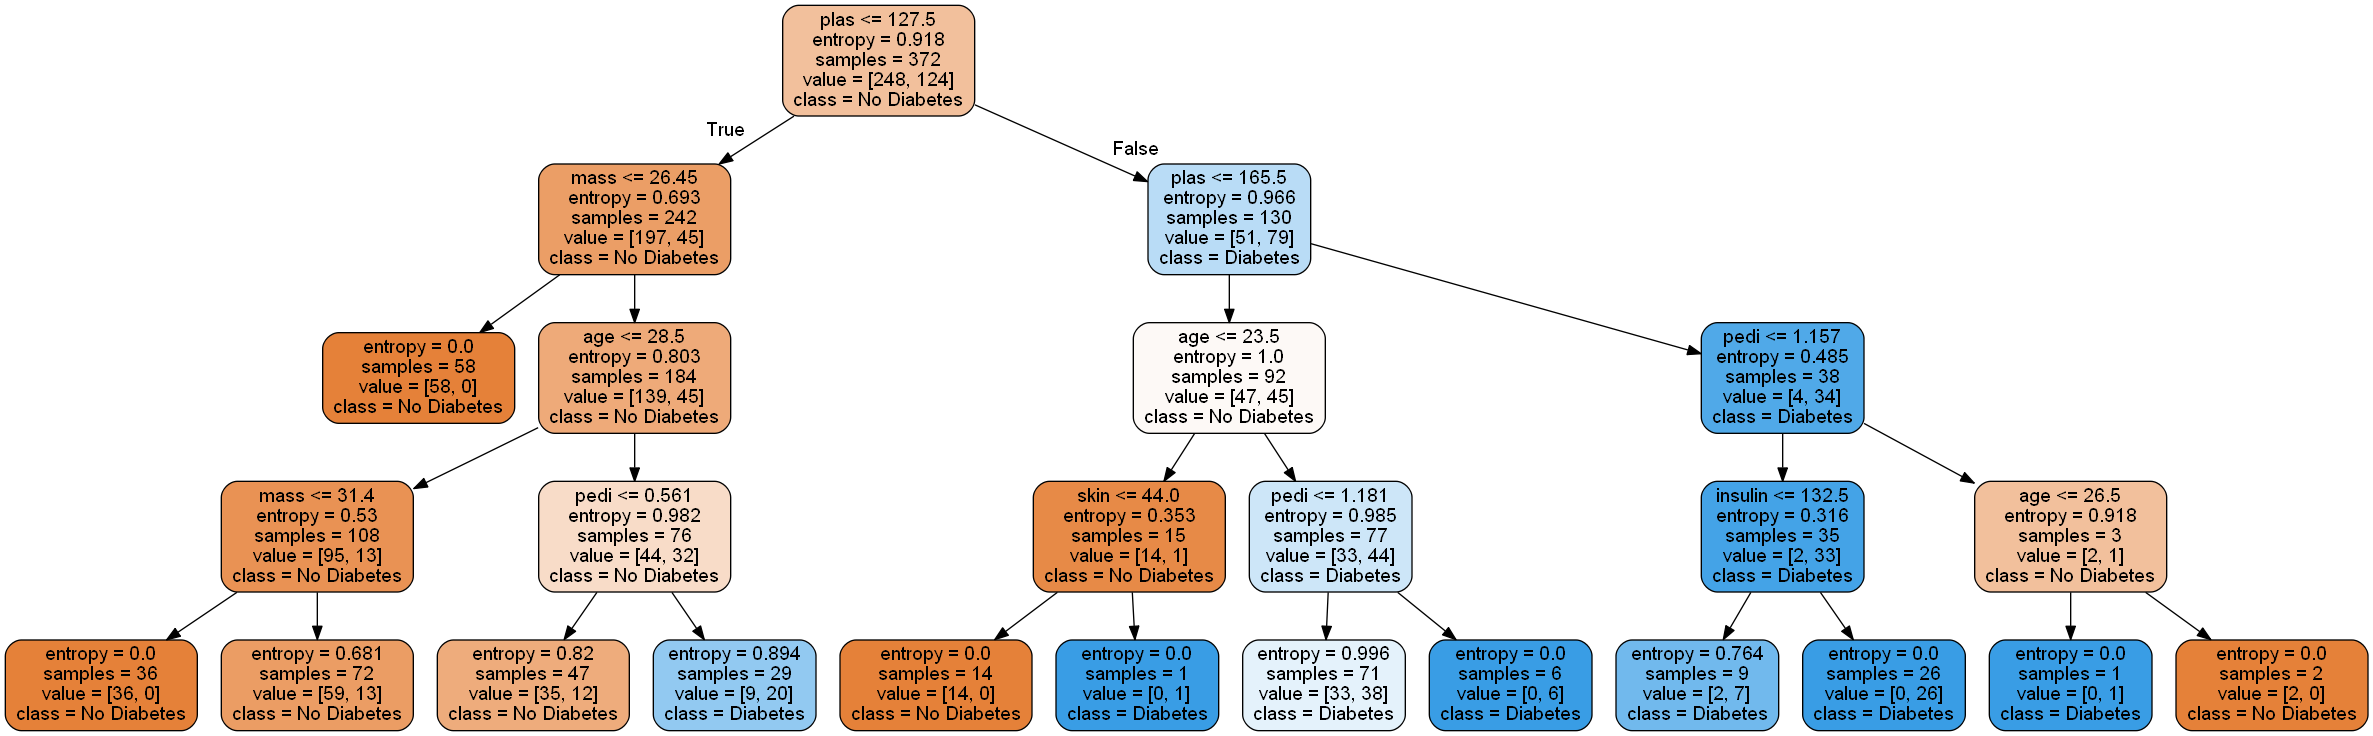

In [52]:
draw_decision_tree(clf1, X_train, y_train, feature_names, 'diabetes')

In [53]:
'''
This function returns a set of rules defined in the Decision Tree which is easy to understand
'''
def tree_to_rules(tree, feature_names, class_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):

        indent = "  " * depth

        if (threshold[node] != -2):

            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")

            if left[node] != -1:

                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")

                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)

                print(indent,"}")

        else:
            if value[node][0,0] > value[node][0,1]:
              classified = class_names[0]
            else:
              classified = class_names[1]
            print(indent,"Class = " + classified)
    recurse(left, right, threshold, features, 0)

In [55]:
tree_to_rules(clf1, list(X_train.loc[:,feature_names]), ['No Diabetes','Diabetes'])

 if ( plas <= 127.5 ) {
   if ( mass <= 26.450000762939453 ) {
     Class = No Diabetes
   } else {
     if ( age <= 28.5 ) {
       if ( mass <= 31.400001525878906 ) {
         Class = No Diabetes
       } else {
         Class = No Diabetes
       }
     } else {
       if ( pedi <= 0.5609999895095825 ) {
         Class = No Diabetes
       } else {
         Class = Diabetes
       }
     }
   }
 } else {
   if ( plas <= 165.5 ) {
     if ( age <= 23.5 ) {
       if ( skin <= 44.0 ) {
         Class = No Diabetes
       } else {
         Class = Diabetes
       }
     } else {
       if ( pedi <= 1.18149995803833 ) {
         Class = Diabetes
       } else {
         Class = Diabetes
       }
     }
   } else {
     if ( pedi <= 1.1565001010894775 ) {
       if ( insulin <= 132.5 ) {
         Class = Diabetes
       } else {
         Class = Diabetes
       }
     } else {
       if ( age <= 26.5 ) {
         Class = Diabetes
       } else {
         Class = No Diabetes
       }
    

In [56]:
varImp_df   = pd.DataFrame({'Feature_names' :feature_names,\
                            'Importances' : clf1.feature_importances_})
varImp_df.sort_values('Importances', ascending = False) 

,Feature_names,Importances
1,plas,0.421959
7,age,0.194800
5,mass,0.187721
6,pedi,0.132511
3,skin,0.035220
4,insulin,0.027789
0,preg,0.000000
2,pres,0.000000


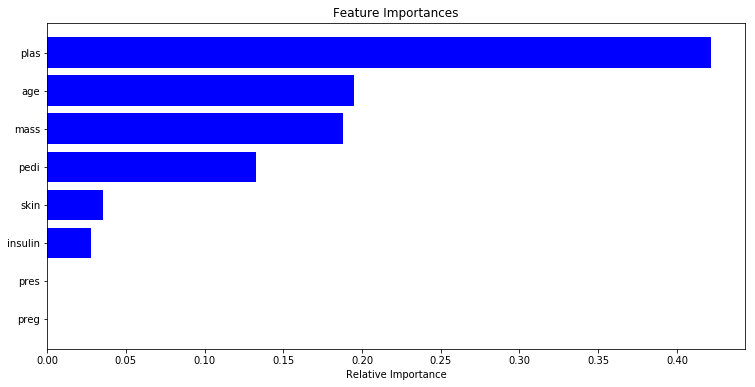

In [57]:
importances = clf1.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()